<a href="https://colab.research.google.com/github/pauloandradecode/Machine_learnig_python/blob/main/Red_neuronal_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proceso de creación de una red neuronal lineal para convertir grados celsius a fahrenheit.-

y = mx + b

In [3]:
!pip install tensorflow -q

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-08-20 01:07:42.358228: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-20 01:07:45.590919: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-20 01:07:45.617322: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-20 01:07:48.337672: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
# Modelos de datos para entrenamiento
celsius = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit = np.array([-40,14,32,46,59,72,100], dtype=float)

In [6]:
# Utilizamos Keras para simplicar el uso de las capas de la red neuronal
# La capa densa son las que tienen conexiones desde cada neurona hacia todas las neuronas de la capa
# layer = tf.keras.layers.Dense(units=1, input_shape=[1])
# Modelo
# model = tf.keras.Sequential([layer]);
layer_hide_1 = tf.keras.layers.Dense(units=1, input_shape=[1])
layer_hide_2 = tf.keras.layers.Dense(units=1, input_shape=[1])
layer_exit = tf.keras.layers.Dense(units=1, input_shape=[1])

model = tf.keras.Sequential([layer_hide_1, layer_hide_2, layer_exit]);

In [7]:
# El optimizador Adam nos ayuda para que los pesos y sesgos se calculen de manera eficiente
# para asegurarnos que le red aprenda y no desaprenda
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.1), # 0.1 = tasa de aprendizaje, entre mas pequeña es la tasa, mas tarda en aprender
    loss='mean_squared_error' # [función de perdida] Una poca cantidad de errores grandes en peor que una gran cantidad de errores pequeños
)


In [8]:
# Entrenamiento de la red neuronal
print('Comenzando entrenamiento')
# epochs = numero de vueltas para el entrenamiento
# verbose = mostrar en terminal el proceso de entrenamiento
history = model.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print('Modelo entrenado')

Comenzando entrenamiento
Modelo entrenado


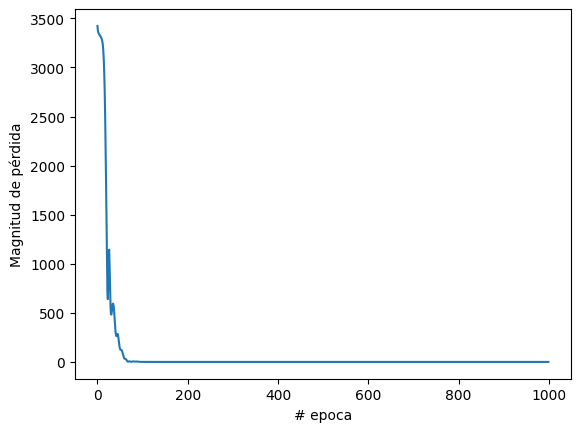

In [9]:
# Datos de la función de perdida
plt.xlabel('# epoca')
plt.ylabel('Magnitud de pérdida')
plt.plot(history.history['loss'])

In [10]:
# Preducción
result = model.predict([100.0])
print('El resultado es: ' + str(result) + 'fahrenheit')

1/1 [==============================] - 0s 85ms/step
El resultado es: [[211.74744]]fahrenheit


In [11]:
# Sesgo de los valores
print('Variables internas del modelo:')
# Posición de los valores = Peso - Sesgo
# print(layer.get_weights())
print(layer_hide_1.get_weights())
print(layer_hide_2.get_weights())
print(layer_exit.get_weights())

Variables internas del modelo:
[array([[0.71955866]], dtype=float32), array([5.7227516], dtype=float32)]
[array([[1.3564631]], dtype=float32), array([6.7874036], dtype=float32)]
[array([[1.8420576]], dtype=float32), array([5.1503935], dtype=float32)]
